<a href="https://colab.research.google.com/github/FrancescoSarandrea/deeplearning/blob/main/heartdisease_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>1 <span style='color:#0386f7de'>|</span> Importing libraries</b>
- **For ML Models**: sklearn 
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn, plotly

In [ ]:
# For ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# <b>2 <span style='color:#0386f7de'>|</span> About the Dataset</b>

### 2020 annual CDC survey data of 400k adults related to their health status
### What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

### Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

### What can you do with this dataset?
As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). But note that classes are not balanced, so the classic model application approach is not advisable. 

In [ ]:
!unzip heart_2020_cleaned.zip

unzip:  cannot find or open heart_2020_cleaned.zip, heart_2020_cleaned.zip.zip or heart_2020_cleaned.zip.ZIP.


In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Column Descriptions
"HeartDisease": intervistati che hanno mai riferito di avere una malattia coronarica (CHD) o un infarto del miocardio (IM).
- `BMI`: Indice di massa corporea (BMI).
- `Smoking`: hai fumato almeno 100 sigarette in tutta la tua vita?
- "AlcoholDrinking": bevitori pesanti (uomini adulti che bevono più di 14 drink a settimana e donne adulte che bevono più di 7 drink a settimana
- `Stroke`: (Mai detto) (hai avuto) un ictus?
- "PhysicalHealth": ora pensando alla tua salute fisica, che include malattie fisiche e lesioni, per quanti giorni negli ultimi 30 giorni la tua salute fisica non era buona? (0-30 giorni).
- `MentalHealth`: pensando alla tua salute mentale, per quanti giorni negli ultimi 30 giorni la tua salute mentale non è stata buona? (0-30 giorni).
- `DiffWalking`: hai serie difficoltà a camminare o salire le scale?
- `Sex`: sei maschio o femmina?
- `AgeCategory`: categoria di età di quattordici livelli. (quindi calcola la media)
- `Race`: valore di razza/etnia attribuito.
- `Diabetic`: (mai detto) (hai avuto) il diabete?
- "PhysicalActivity": adulti che hanno riferito di aver svolto attività fisica o esercizio fisico negli ultimi 30 giorni in modo diverso dal normale lavoro.
- `GenHealth`: Diresti che in generale la tua salute è...
- `SleepTime`: in media, quante ore di sonno dormi in un periodo di 24 ore?
- `Asthma`: (mai detto) (hai avuto) l'asma?
- "KidneyDisease": senza contare calcoli renali, infezioni della vescica o incontinenza, le è mai stato detto di avere una malattia renale?
- `SkinCancer`: (Mai detto) (hai avuto) il cancro della pelle?

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`, `AgeCategory`, `SleepTime`

## Column Statistics (of numerical data)

In [ ]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'SleepTime']].T.style.background_gradient(cmap='Greens')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


## Column Statistics (of categorical data)

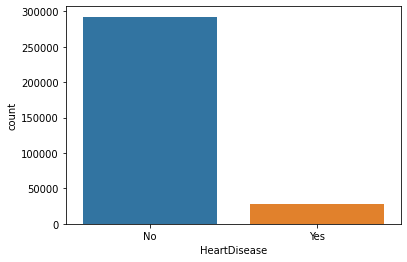

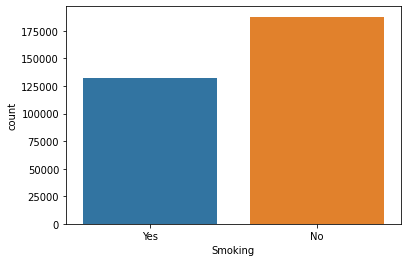

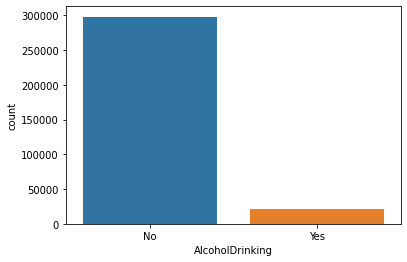

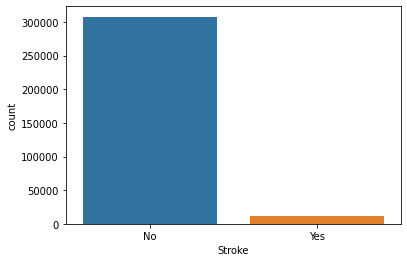

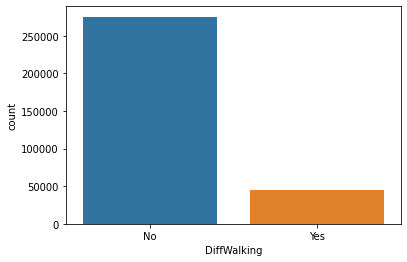

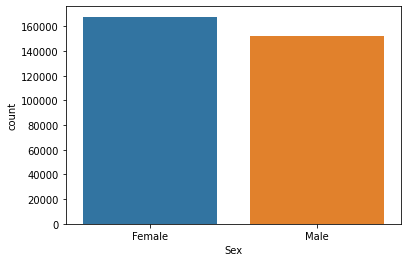

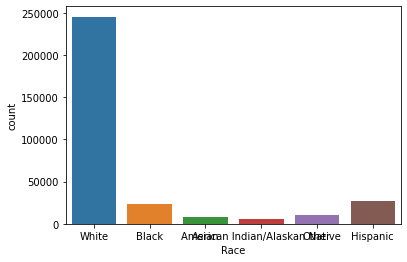

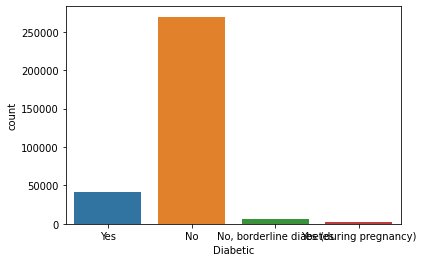

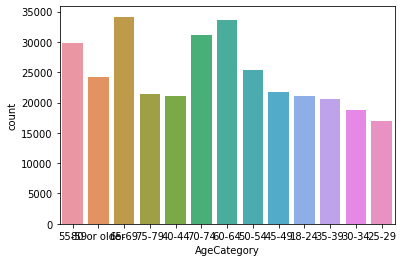

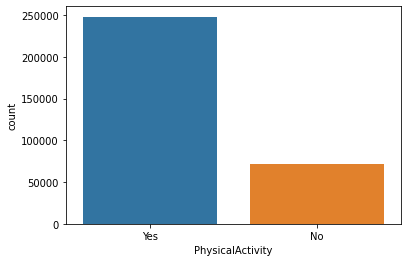

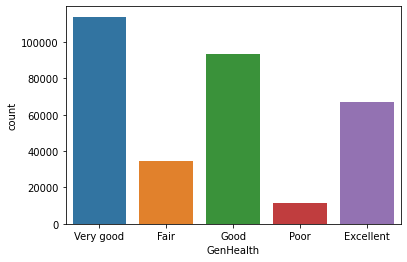

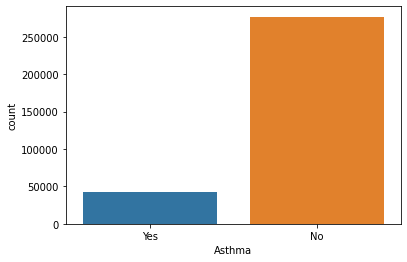

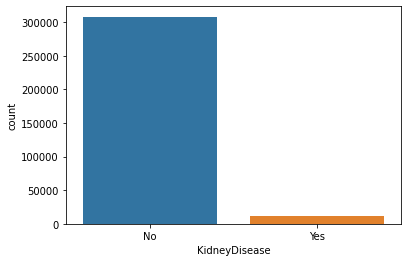

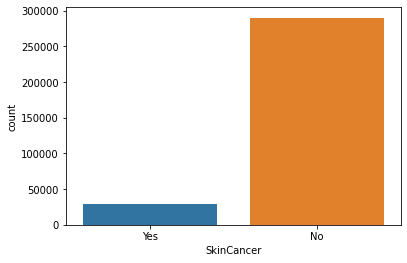

In [ ]:
import seaborn as sns
categ = ["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking", "Sex", 'Race', 'Diabetic', 'AgeCategory',
         'PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for nome in categ:
    ax = sns.countplot( x=nome, data=df)
    plt.show()

#### AgeCategory is categorical, if you want to transform as continuous variable you can calculate the mean age 

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':85, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}

recod = df['AgeCategory'].map(encode_AgeCategory)
df['AgeCategory'] = recod.astype('float')

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,85.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62.0,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37.0,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47.0,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27.0,Hispanic,No,No,Good,12.0,No,No,No


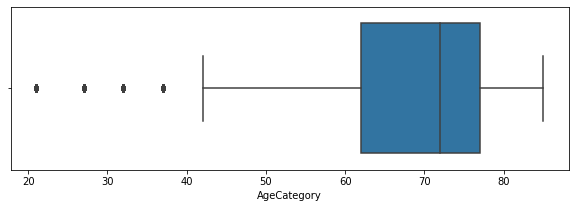

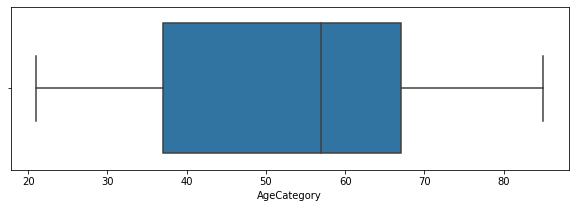

In [ ]:
#sns.set(rc={'figure.figsize':(16,3)})
plt.figure(figsize=(10,3))
sns.boxplot(x=df[df['HeartDisease']=='Yes']['AgeCategory'])
plt.show()
plt.figure(figsize=(10,3))
sns.boxplot(x=df[df['HeartDisease']=='No']['AgeCategory'])
plt.show()

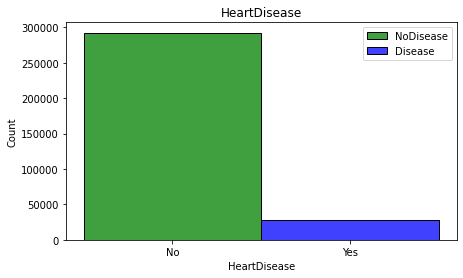

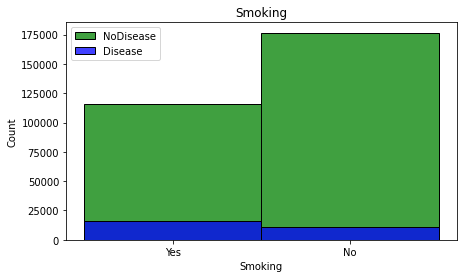

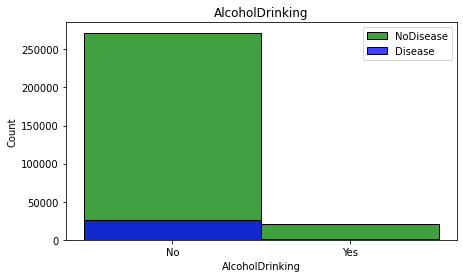

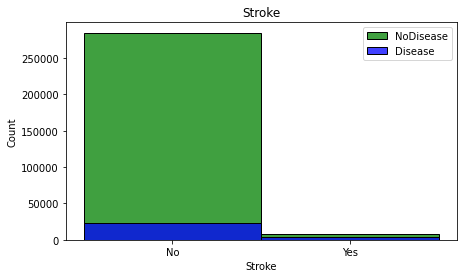

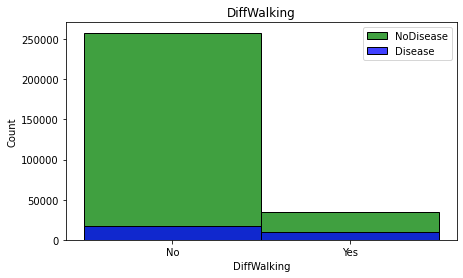

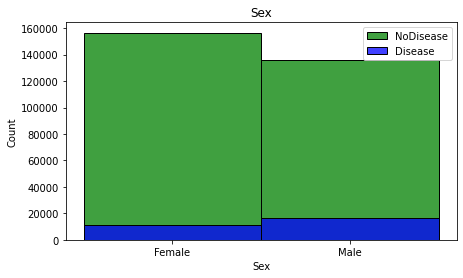

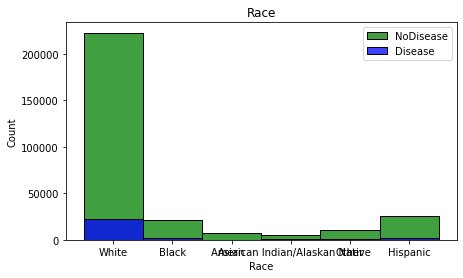

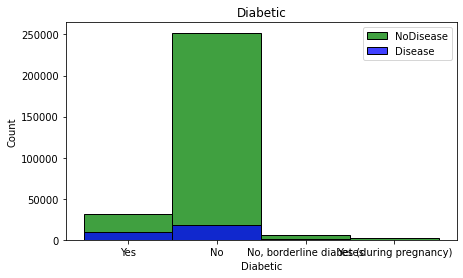

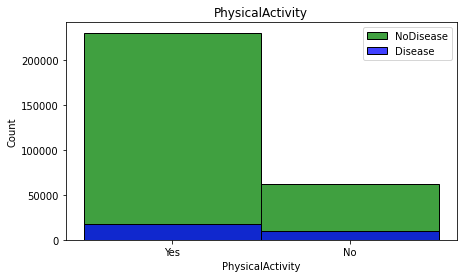

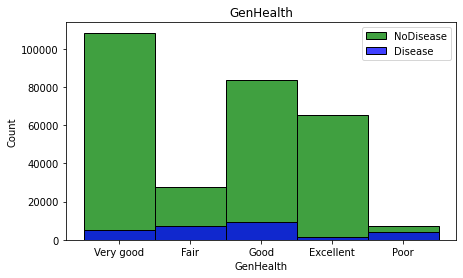

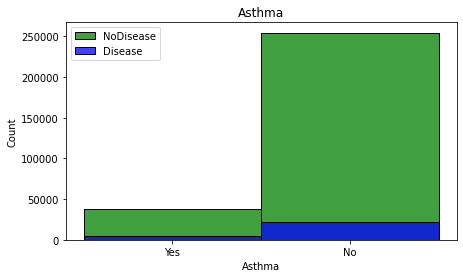

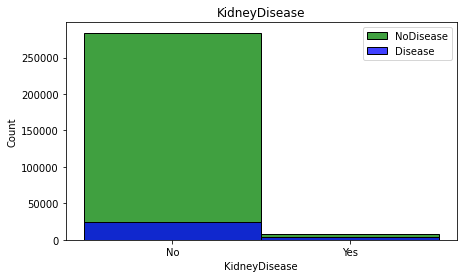

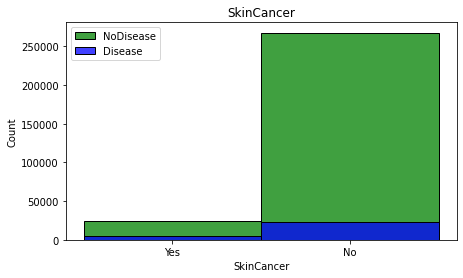

In [ ]:
categ = ["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking", "Sex", 'Race', 'Diabetic', 
         'PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for nome in categ:
  plt.figure(figsize=(7,4))
  sns.histplot(x=df[df['HeartDisease']=='No'][nome], color='green', label='NoDisease')
  sns.histplot(x=df[df['HeartDisease']=='Yes'][nome], color='blue', label='Disease')
  plt.legend()
  plt.title(nome)
  plt.show()

In [ ]:
categB = ["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking","Sex",'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

## ENCODING

In [ ]:
le = LabelEncoder()
for col in categB:
    df[col] = le.fit_transform(df[col])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85.0,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27.0,Hispanic,No,0,Good,12.0,0,0,0


In [ ]:
df = pd.get_dummies(df,columns=['Race','Diabetic','GenHealth'],
                    prefix=['race','diabet','genh'])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabet_No,"diabet_No, borderline diabetes",diabet_Yes,diabet_Yes (during pregnancy),genh_Excellent,genh_Fair,genh_Good,genh_Poor,genh_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,27.0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
categVar = ["HeartDisease","Smoking","AlcoholDrinking","Stroke",
            #'Race',
            #'Diabetic',
            #'GenHealth',
            "DiffWalking",
            "Sex",'PhysicalActivity','Asthma',
            'KidneyDisease', 'SkinCancer']
le = LabelEncoder()
for col in categVar:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'race_American Indian/Alaskan Native', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'diabet_No',
       'diabet_No, borderline diabetes', 'diabet_Yes',
       'diabet_Yes (during pregnancy)', 'genh_Excellent', 'genh_Fair',
       'genh_Good', 'genh_Poor', 'genh_Very good'],
      dtype='object')

## TRAIN TEST SPLIT

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df['HeartDisease'].value_counts())
print(val_df['HeartDisease'].value_counts())

0    234055
1     21781
Name: HeartDisease, dtype: int64
0    58367
1     5592
Name: HeartDisease, dtype: int64


## BALANCE CLASSES

In [ ]:
class_0 =train_df[train_df['HeartDisease']==0]
class_1 =train_df[train_df['HeartDisease']==1]
aug = class_1.sample(len(class_0),replace=True)

In [ ]:
train_df = pd.concat([class_0,aug],axis=0)
train_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabet_No,"diabet_No, borderline diabetes",diabet_Yes,diabet_Yes (during pregnancy),genh_Excellent,genh_Fair,genh_Good,genh_Poor,genh_Very good
95877,0,23.33,1,0,0,0.0,0.0,0,1,77.0,...,1,1,0,0,0,0,0,0,0,1
260256,0,32.69,0,0,0,2.0,2.0,0,1,52.0,...,0,1,0,0,0,0,0,0,0,1
84785,0,31.32,0,0,0,0.0,0.0,0,0,27.0,...,1,1,0,0,0,1,0,0,0,0
132065,0,25.77,0,0,0,7.0,0.0,0,1,52.0,...,1,1,0,0,0,1,0,0,0,0
218594,0,26.39,0,0,0,0.0,1.0,0,1,32.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180092,1,22.15,1,0,0,0.0,0.0,0,1,85.0,...,1,1,0,0,0,0,0,0,1,0
253650,1,27.88,0,0,0,25.0,0.0,0,1,85.0,...,1,1,0,0,0,0,1,0,0,0
266315,1,26.54,1,0,0,0.0,5.0,0,1,57.0,...,1,1,0,0,0,0,0,1,0,0
224992,1,25.63,1,0,0,0.0,0.0,0,1,62.0,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
print(train_df['HeartDisease'].value_counts())

0    234055
1    234055
Name: HeartDisease, dtype: int64


In [ ]:
train_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'race_American Indian/Alaskan Native', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'diabet_No',
       'diabet_No, borderline diabetes', 'diabet_Yes',
       'diabet_Yes (during pregnancy)', 'genh_Excellent', 'genh_Fair',
       'genh_Good', 'genh_Poor', 'genh_Very good'],
      dtype='object')

## SEPARATE THE TARGET

In [ ]:
y_train = train_df['HeartDisease']
#X_train = train_df.drop(labels=['HeartDisease','AgeCategory','BMI','PhysicalHealth','MentalHealth'],axis=1)
X_train=train_df['Sex']
y_train

95877     0
228939    1
260256    0
84785     0
83845     1
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: HeartDisease, Length: 255836, dtype: int64

In [ ]:
y_val = val_df['HeartDisease']
#X_val = val_df.drop(labels=['HeartDisease','AgeCategory','BMI','PhysicalHealth','MentalHealth'],axis=1)
X_val = val_df['Sex']
y_val

271884    0
270361    0
219060    0
24010     0
181930    0
         ..
181387    0
13791     0
180164    0
94526     0
107129    0
Name: HeartDisease, Length: 63959, dtype: int64

In [ ]:
# ora costruiamo il il NN
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.models import Model

inp=Input(shape=(255836))
x=Dense(512, activation='relu')(inp)
x=Dense(128, activation='relu')(x)
#x=Dense(128, activation='relu')(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
out=Dense(1,activation='sigmoid')(x)

#definiamo il modello

modello=Model(inp,out)
# con summary stampiamo le caratteristiche del modello
modello.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 255836)]          0         
                                                                 
 dense_13 (Dense)            (None, 512)               130988544 
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 131,054,337
Trainable params: 131,054,337
Non

In [ ]:
len(y_train)

1

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import  mnist 
from tensorflow.keras.utils import to_categorical 

In [ ]:
y_train=np.array(y_train)
y_val=np.array(y_val)

In [ ]:
# trasformiamo le variabili target  in train e validation in dummy
#y_train=to_categorical(y_train,num_classes=1)
#y_val=to_categorical(y_val,num_classes=1) 

IndexError: ignored

In [ ]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train=np.array(X_train)
X_val=np.array(X_val)

In [ ]:
X_train

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
modello.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
print(type(y_train))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train=X_train.reshape(1,len(X_train))
X_val=X_val.reshape(1,len(X_val))

In [ ]:
y_train=y_train.reshape(1,len(y_train))
y_val=y_val.reshape(1,len(y_val))

In [ ]:
print(y_train[0][0])
print(X_train[0][0])

0
1


In [ ]:
y_train.shape

(1, 255836)

In [ ]:
modello.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),batch_size=64)

Epoch 1/20


ValueError: ignored

## RANDOM FORESTS

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [ ]:
# quando inizialisiamo la Random Forest dobbiamo specificare il numero di alberi,
# il numero di foglie e il numero di variabili per albero
clf = RandomForestClassifier(n_estimators=200,min_samples_split=15,
                             min_samples_leaf=8, max_features=4)
clf.fit(X_train,y_train)


RandomForestClassifier(max_features=4, min_samples_leaf=8, min_samples_split=15,
                       n_estimators=200)

## In alternativa usiamo un albero ...

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=15,min_samples_leaf=8)
clf.fit(X_train,y_train)


DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=15)

## I comandi successivi sono gli stessi ...

## EVALUATION ON TEST

In [ ]:
y_pred = clf.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     58367
           1       0.25      0.68      0.37      5592

    accuracy                           0.79     63959
   macro avg       0.61      0.74      0.62     63959
weighted avg       0.90      0.79      0.83     63959



### CONFUSION MATRIX

In [ ]:
confusion_matrix(y_val,y_pred)

array([[47043, 11324],
       [ 1794,  3798]])

### CHANGE THE THREESHOLD

In [ ]:
y_prob = clf.predict_proba(X_val)
y_prob

array([[0.93822591, 0.06177409],
       [0.98437972, 0.01562028],
       [0.97661461, 0.02338539],
       ...,
       [0.90792807, 0.09207193],
       [0.89152137, 0.10847863],
       [0.17650083, 0.82349917]])

In [ ]:
y_pred_t = y_prob[:,1]>0.7
confusion_matrix(y_val,y_pred_t)

array([[51271,  7096],
       [ 2484,  3108]])

## AUC

In [ ]:
from sklearn import metrics
print(metrics.roc_auc_score(y_val, y_prob[:,1]))

0.820169888216324


### EVALUATION ON TRAIN

In [ ]:
yy_pred = clf.predict(XX_train)
print(classification_report(yy_train,yy_pred))
confusion_matrix(yy_train,yy_pred)

## ROC

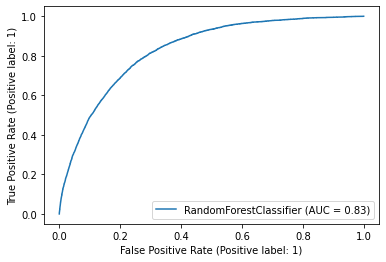

In [ ]:
RocCurveDisplay.from_estimator(clf, X_val, y_val)

## PRECISION - RECALL

In [ ]:
predictions = clf.predict(X_val)

In [ ]:
precision, recall, _ = precision_recall_curve(y_val,predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### LOSS CURVE

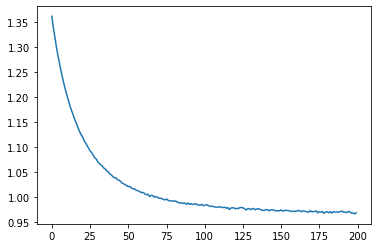

In [ ]:
#clf.score(X_train,y_train)
plt.plot(clf.train_score_)

# Gradient Boosting

class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, subsample=0.6, learning_rate=0.05)
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, subsample=0.6)

In [ ]:
predictions = clf.predict_proba(X_test)
np.savetxt("sample.txt", predictions, delimiter =", ")

## HistGradientBoostingClassifier

class sklearn.ensemble.HistGradientBoostingClassifier(loss='auto', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)

In [ ]:
X_train.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

["HeartDisease", "Smoking", "AlcoholDrinking","Stroke",
        "DiffWalking", "Sex", 'Race', 'Diabetic', 
         'PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
lista=[False,True,True,True,False,False,True,True,False,True,True,True,True,False,
       True,True,True]
clf = HistGradientBoostingClassifier(categorical_features=lista, loss='binary_crossentropy',
                                     max_iter=300,learning_rate=0.05)

In [ ]:
clf.fit(X_train,y_train)

HistGradientBoostingClassifier(categorical_features=[False, True, True, True,
                                                     False, False, True, True,
                                                     False, True, True, True,
                                                     True, False, True, True,
                                                     True],
                               learning_rate=0.05, loss='binary_crossentropy',
                               max_iter=300)

# SVM

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
from sklearn.utils import resample
XX_train , yy_train = resample(X_train,y_train,replace=False, n_samples=25000) 

In [ ]:
from sklearn.svm  import  SVC
clf = SVC(kernel='poly',tol=0.0001,C=3)
clf.fit(XX_train,yy_train)

SVC(C=3, kernel='poly', tol=0.0001)

# LogisticRegression

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', max_iter=1000)
clf.fit(XX_train,yy_train)

LogisticRegression(max_iter=1000, penalty='none')